In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kyphosis = pd.read_csv("/content/drive/MyDrive/dataset/kyphosis .csv")
kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [ ]:
# extracting the independent variable
x = kyphosis.drop("Kyphosis", axis=1)

# extracting the dependent variable
y = kyphosis["Kyphosis"]

<Axes: xlabel='Kyphosis', ylabel='Age'>

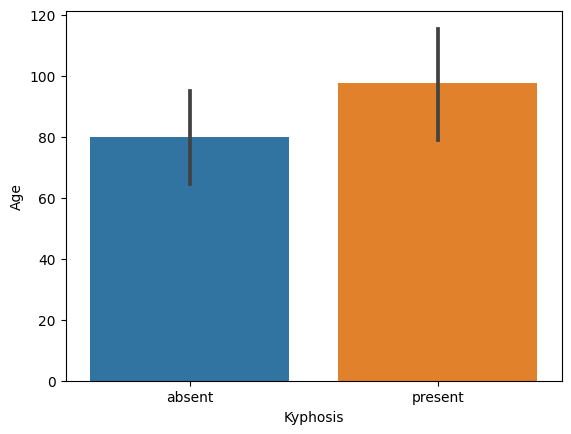

In [ ]:
# data analysis

sns.barplot(x="Kyphosis", y= "Age", data=kyphosis)

In [ ]:
# sns.pairplot(kyphosis, hue="b", palette="set1")

<Axes: xlabel='Age', ylabel='count'>

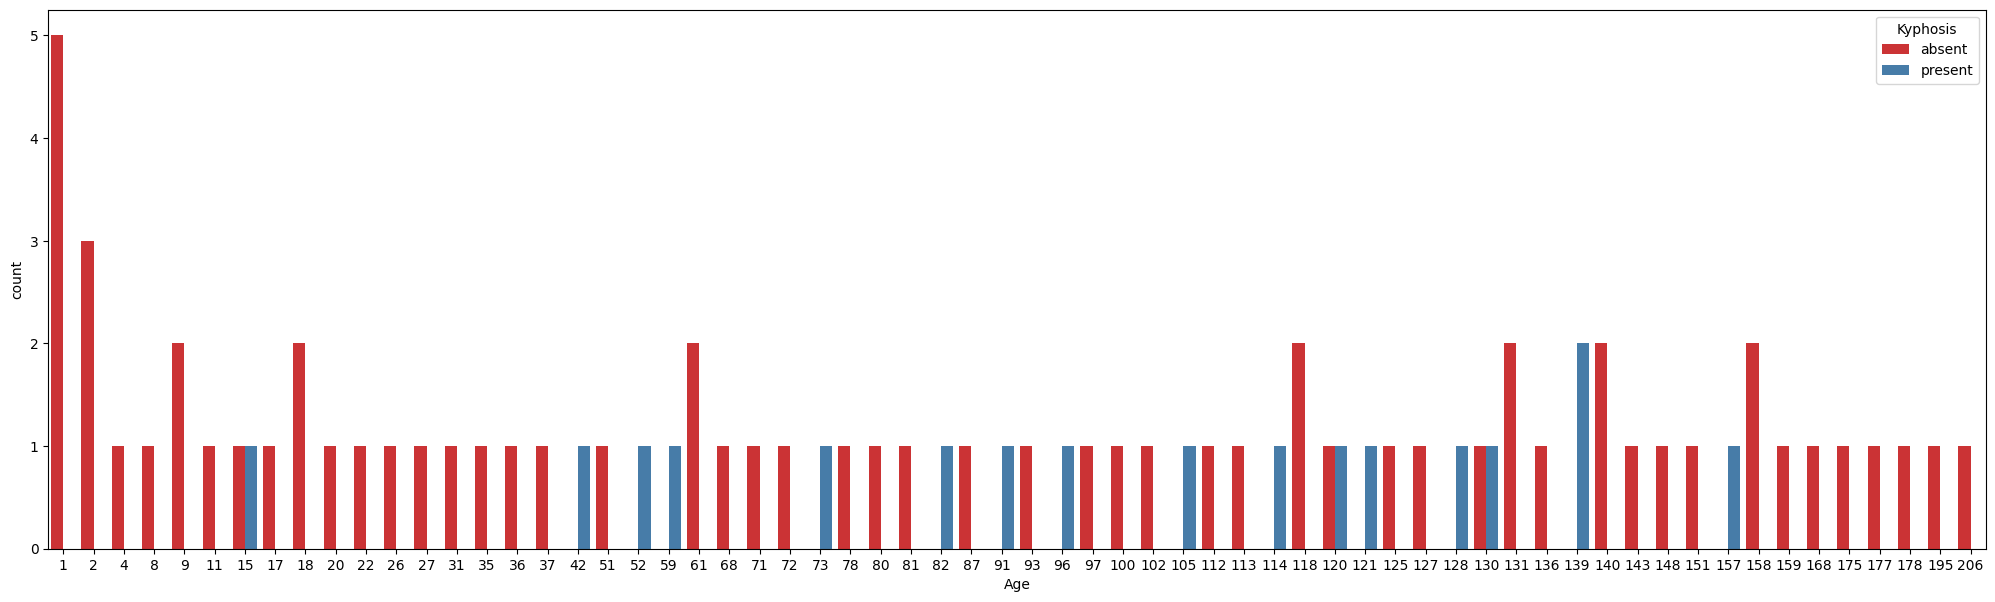

In [ ]:
# visualizing the dataset

plt.figure(figsize=(25,7))
sns.countplot(x="Age", hue="Kyphosis", data=kyphosis, palette="Set1")

In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=100)


In [ ]:
# extracting the independent variable
x = kyphosis.drop("Kyphosis", axis=1)

# extracting the dependent variable
y = kyphosis["Kyphosis"]

In [ ]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [ ]:
x = kyphosis.iloc[:,[1,2,3]].values

In [ ]:
x

array([[ 71,   3,   5],
       [158,   3,  14],
       [128,   4,   5],
       [  2,   5,   1],
       [  1,   4,  15],
       [  1,   2,  16],
       [ 61,   2,  17],
       [ 37,   3,  16],
       [113,   2,  16],
       [ 59,   6,  12],
       [ 82,   5,  14],
       [148,   3,  16],
       [ 18,   5,   2],
       [  1,   4,  12],
       [168,   3,  18],
       [  1,   3,  16],
       [ 78,   6,  15],
       [175,   5,  13],
       [ 80,   5,  16],
       [ 27,   4,   9],
       [ 22,   2,  16],
       [105,   6,   5],
       [ 96,   3,  12],
       [131,   2,   3],
       [ 15,   7,   2],
       [  9,   5,  13],
       [  8,   3,   6],
       [100,   3,  14],
       [  4,   3,  16],
       [151,   2,  16],
       [ 31,   3,  16],
       [125,   2,  11],
       [130,   5,  13],
       [112,   3,  16],
       [140,   5,  11],
       [ 93,   3,  16],
       [  1,   3,   9],
       [ 52,   5,   6],
       [ 20,   6,   9],
       [ 91,   5,  12],
       [ 73,   5,   1],
       [ 35,   3

In [ ]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=100)

In [ ]:
# train a decisiontree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# prediction the model

predictions = dtree.predict(x_test)
predictions

array(['absent', 'present', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [ ]:
# evaluation the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.68      0.77        22
     present       0.12      0.33      0.18         3

    accuracy                           0.64        25
   macro avg       0.50      0.51      0.48        25
weighted avg       0.79      0.64      0.70        25



In [ ]:
print(confusion_matrix(y_test, predictions))

[[15  7]
 [ 2  1]]


In [ ]:
# train a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred = dtree.predict(x_test)
rf_pred

array(['absent', 'present', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,rf_pred))

[[15  7]
 [ 2  1]]


In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

      absent       0.88      0.68      0.77        22
     present       0.12      0.33      0.18         3

    accuracy                           0.64        25
   macro avg       0.50      0.51      0.48        25
weighted avg       0.79      0.64      0.70        25

